# Implementing a Gaussian Mixture Model from Scratch
<hr>
In this notebook, we will delve into the implementation of an Unsupervised Learning model, such as the Gaussian Mixture Model (GMM). We will delve into the math in each step.

A Gaussian Mixture model is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. This model relies on the __Expectation Maximization__ (EM) algorith, which has many similarities with the K-Means algorithm.

The model initialize the cluster parameters randomly, then it repeats two steps until convergence, fisrt assigning instances to clusters (this is called the expectation step) and then updating the clusters (this is called the maximization step).

<br>

#### Expectation Step

In this step, we need to calculate the probability of $P(Z_k | X_i)$ where $Z_k$ represent the $k$-th cluster and $X_i$ the $i$-th sample, wich means we would have $\vec{\gamma} \in \mathbb R_{n\cdot k}$, $n$ samples and $k$ clusters. We can achieve this using Bayes' theorem.

$$ \vec{\gamma}(z_{nk}) = P(z_{nk=1} | x_n)= \frac{P(z_{k=1}) ~ P(x_n | z_{nk=1})}{\sum_{j=1}^k P(z_j) ~ P(x_n | z_j)} = \frac{\pi_{k=1} ~ N(x_n | \mu_{k=1}, \Sigma_{k=1})}{\sum_{j=1}^k \pi_j ~ N(x_n | \mu_j, \Sigma_j)} ~~ \in \mathbb R_{n ~\times ~k} $$
$$ N_k= \sum_{n=1}^N \vec{\gamma}(z_{nk}) ~~\in \mathbb R $$

$N(x_n | \mu_{k}, \Sigma_{k})$ represent a Multivariate Normal distribution with a covarianze matrix $\Sigma$ and a mean $\mu$.

Once we calculate all $\gamma(z_{nk})$ for each sample in each cluster (in each Multivariate Normal Distribution) we can optimize our parameters $\Sigma$ and $\mu$ in the __Maximization Step__.

<hr><br>

#### Maximization Step

In this step we will optimize our parameters based on the previous $\vec{\gamma}(z_{nk})$ calculated with the following equations:

* $\mu_k=~ \frac{1}{N_k} \sum_{n=1}^N \gamma(z_nk)\cdot x_n$
* $\Sigma_k=~ \frac{1}{N_k} \sum_{n=1}^N \gamma(z_nk)\cdot (x_n - \mu_k)^T(x_n - \mu_k),~~~ (x_n-\mu) \in \mathbb R_{n \times m}$ where $m$ represent the number of features.
* $\pi_k=~ \frac{N_k}{N}$ where $N$ is the number of samples.
<hr>

We will iterate these steps until the model converges. These are the most important aspects in the Guassian Mixture model. Finally, if you want to predict the cluster index for a new sample, you must calculate the probability of each Multivariate Normal Distribution of each cluster and then return the probability of each cluster or the index of the most probable cluster.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Bayesian-gaussian-mixture-vb.svg/1024px-Bayesian-gaussian-mixture-vb.svg.png" alt="Plate_notation" width="300" height="200">

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [192]:
# Import Iris dataset
iris = load_iris()

# Get the Peatal lenght and Petal Width.
X_data = iris.data[:, [2,3]]
y_data = iris.target

# Scale the data
sc = StandardScaler()
X_data = sc.fit_transform(X_data)

## Train the Gaussian Mixture Model

In [193]:
from GaussianMixture import GaussianMixture

In [203]:
k= 2
model= GaussianMixture(n_components= k)
model.fit(X_data)

C:\Users\ADMIN\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Visualize Decision Boundaries

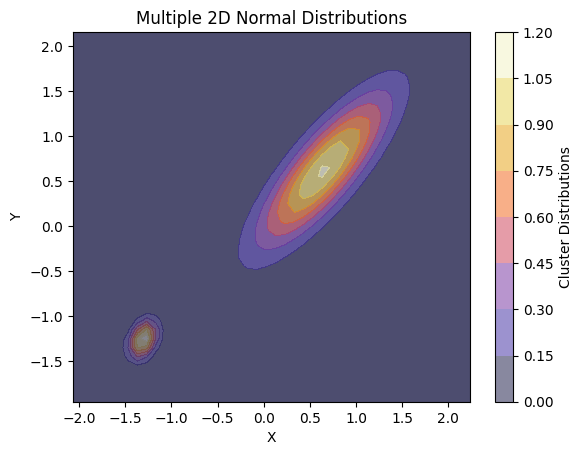

In [206]:
x_set, y_set = x_data, y_data

X1, X2 = np.meshgrid(np.arange(x_set[:,0].min()-0.5, x_set[:,0].max()+0.5, 0.1),
                    np.arange(x_set[:,1].min()-0.5, x_set[:,1].max()+0.5, 0.1))
Z= model.predict_proba(np.c_[X1.ravel(), X2.ravel()])

for i in range(k):
    plt.contourf(X1, X2, Z[:,i].reshape(X1.shape), 
                 cmap= "CMRmap", alpha=.5)
plt.colorbar(label='Cluster Distributions')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Multiple 2D Normal Distributions')
plt.show()